<a href="https://colab.research.google.com/github/Yutong-Lu/Datathon-4/blob/main/Rohini_Logistic_Regression_with_RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Necessary Libraries

In [242]:
!pip install category_encoders

In [243]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
import category_encoders as ce
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#Explore Dataset

In [244]:
# Load dataset
!git clone https://github.com/Yutong-Lu/Datathon-4.git

Cloning into 'Datathon-4'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 131 (delta 57), reused 41 (delta 14), pack-reused 0
Receiving objects: 100% (131/131), 17.31 MiB | 9.77 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [245]:
cd ./Datathon-4

/content/Datathon-4/Datathon-4/Datathon-4/Datathon-4/Datathon-4


In [246]:
def get_dataframe(name):
    df = pd.read_csv(f'{name}.csv')
    return df

In [247]:
# Display data
name = 'datathon4'
data = get_dataframe(name)
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [248]:
# Explore dataset
description = data.describe()
description

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [249]:
# Drop ID-related and death probability-related columns
data = data.drop(['encounter_id', 'patient_id', 'hospital_id','icu_id',
               'apache_3j_bodysystem', 'apache_2_bodysystem', 'readmission_status',
                'apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob'], axis=1)

In [250]:
# Verify columns dropped
print(list(data.columns))

['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_

In [251]:
# Checking for missing values
print(data.isnull().sum())

hospital_death                    0
age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
                               ... 
hepatic_failure                 715
immunosuppression               715
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
Length: 177, dtype: int64


In [252]:
# Drop features with over 75% missing values
print(data.shape)
data = data.dropna(axis=1, thresh=data.shape[0] * (3/4))
print(data.shape)

(91713, 177)
(91713, 103)


In [253]:
# Display columns
print(data.columns.tolist())

['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min'

In [254]:
# Remove rows with NaN
data = data.dropna()
print(data.shape)

(30676, 103)


#Split Features and Target

In [255]:
# Variable types
column_types = data.dtypes

# Filter string variables
string_columns = column_types[column_types == 'object'].index.tolist()

print("String columns:", string_columns)

String columns: ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type']


In [256]:
le = LabelEncoder()
data['ethnicity'] = le.fit_transform(data['ethnicity'])
data['gender'] = le.fit_transform(data['gender'])
data['hospital_admit_source'] = le.fit_transform(data['hospital_admit_source'])
data['icu_admit_source'] = le.fit_transform(data['icu_admit_source'])
data['icu_stay_type'] = le.fit_transform(data['icu_stay_type'])
data['icu_type'] = le.fit_transform(data['icu_type'])

In [257]:
#Check encoding
data.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,...,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,68.0,22.730000,0,2,1,180.3,4,1,0,...,14.1,14.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,27.420000,0,2,0,160.0,4,1,0,...,23.3,12.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0,67.0,27.560000,0,2,1,190.5,2,0,0,...,10.9,10.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,0,46.0,25.845717,0,3,1,167.6,3,0,0,...,9.7,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0,87.0,21.963763,0,2,1,180.3,4,1,0,...,9.9,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

In [259]:
# Check variance
selector = VarianceThreshold(threshold = 0)
selector.fit(data)

VarianceThreshold(threshold=0)

In [260]:
# Feature selection
mask = selector.get_support()
data = data.loc[:, mask]

data.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,...,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,68.0,22.730000,0,2,1,180.3,4,1,0,...,14.1,14.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,27.420000,0,2,0,160.0,4,1,0,...,23.3,12.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0,67.0,27.560000,0,2,1,190.5,2,0,0,...,10.9,10.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,0,46.0,25.845717,0,3,1,167.6,3,0,0,...,9.7,9.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0,87.0,21.963763,0,2,1,180.3,4,1,0,...,9.9,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [261]:
# Split data into features and target
X = data.drop('hospital_death', axis=1)
y = data['hospital_death']

print(X.shape, y.shape)

(30676, 101) (30676,)


<Axes: >

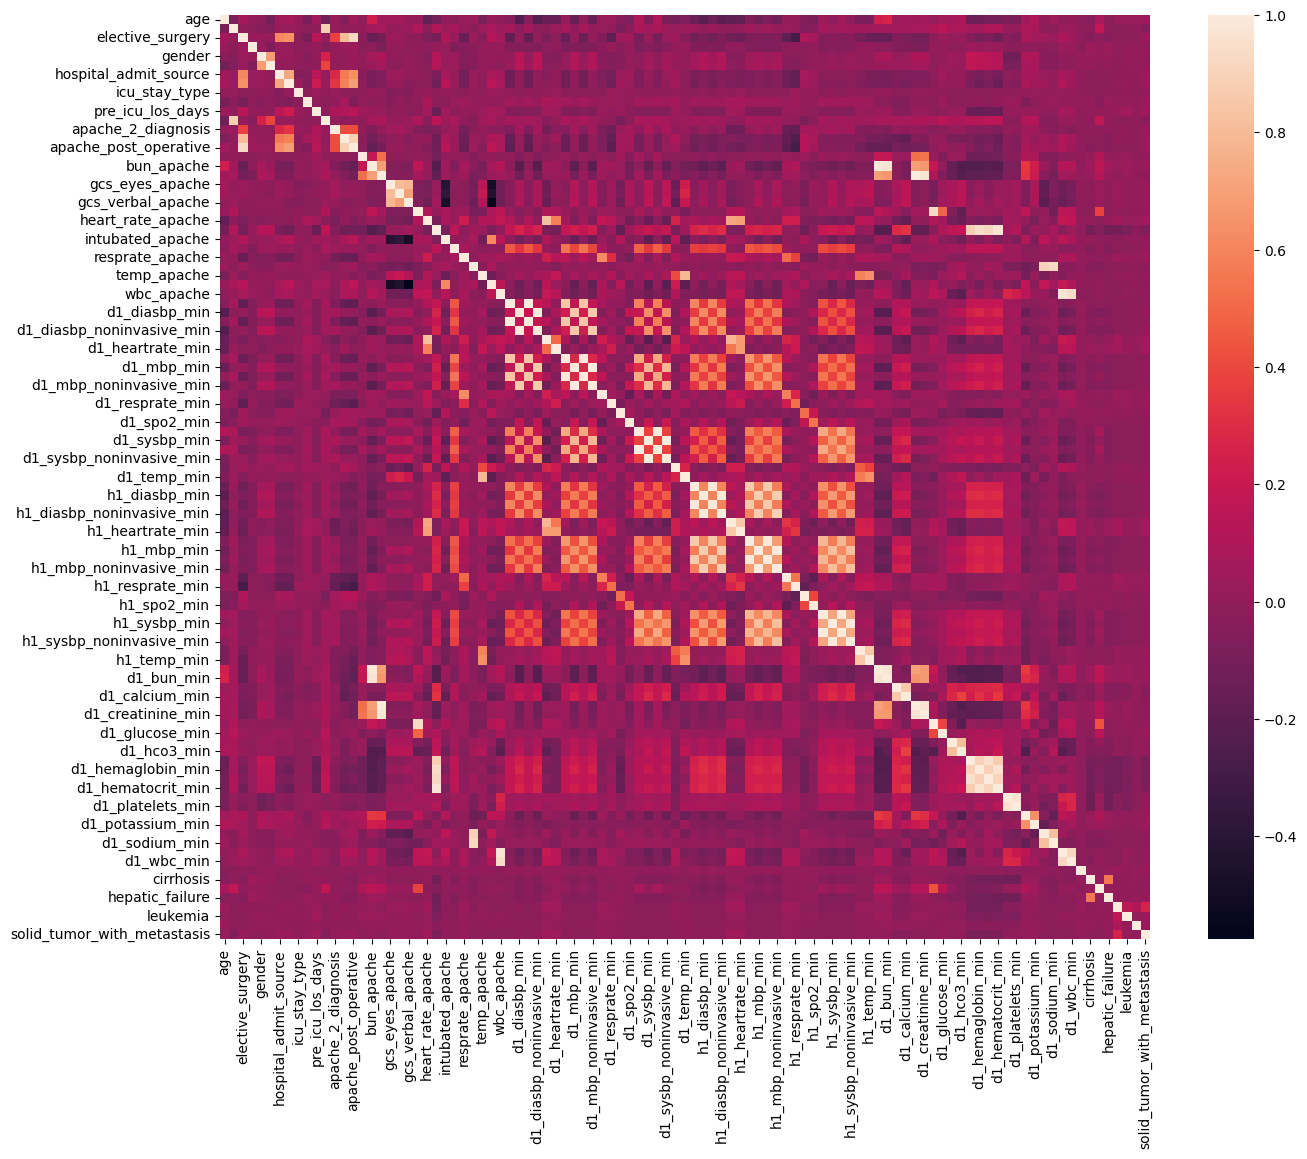

In [262]:
#Plotting the correlation heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix)

In [263]:
# Check multicollinearity
multicollinear_cols = set()

for i in range (len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j]) > 0.7:
      multicollinear_cols.add(correlation_matrix.columns[i])

print(len(multicollinear_cols))

47


In [264]:
# Drop variables with high multicollinearity
X.drop(labels=multicollinear_cols, axis = 1, inplace=True)
X.shape

(30676, 54)

In [265]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [266]:
scaler = StandardScaler() #Scales to mean of 0, SD of 1
X_train = scaler.fit_transform(X_train) #Calculates mean and SD, then scales
X_test = scaler.transform(X_test) #Applies same scaling to test set

#Initialize Logistic Regression

In [267]:
# Initialize a Logistic Regression model
model = LogisticRegression()

In [268]:
# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

#Initialize RFECV

In [269]:
# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)

In [270]:
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='roc_auc')

#Optimal Number of Features

In [271]:
# RFECV
print(rfecv)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='roc_auc')


In [272]:
# Print the optimal number
optimal_num_features = rfecv.n_features_
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 53


In [273]:
# Features ranking low
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [274]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

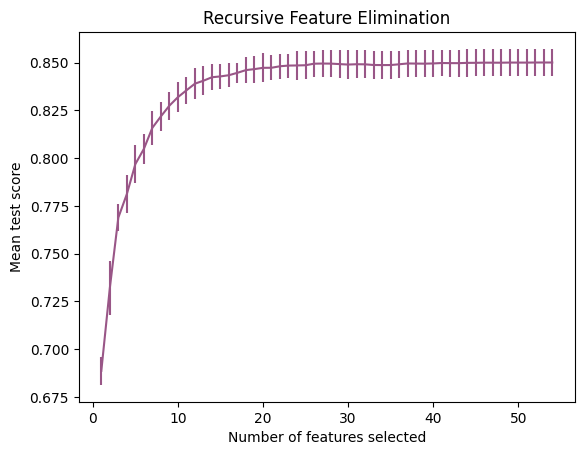

In [275]:
# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()

# Inflection point around 2-3, optimal number is 102

#Train LR with Selected Features

In [276]:
# Select only the features that were chosen by RFECV
X_train = X_train[:, rfecv.support_]
X_test = X_test[:, rfecv.support_]

In [277]:
# Preprocess and transform the training and test sets
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [278]:
# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [279]:
# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [280]:
# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

In [281]:
# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

======== Training Set ==========
AUC :  0.7744018502239572
Accuracy :  0.9191524042379788
Confusion Matrix:
[[22133  1726]
 [  258   423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     23859
           1       0.20      0.62      0.30       681

    accuracy                           0.92     24540
   macro avg       0.59      0.77      0.63     24540
weighted avg       0.97      0.92      0.94     24540



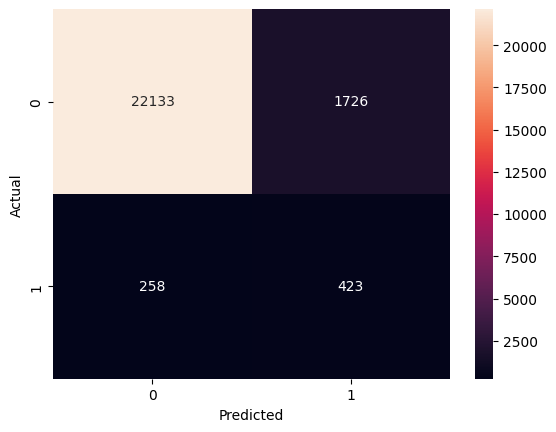

In [282]:
sns.heatmap(conf_matrix_train, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [283]:
# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

======== Test Set ==========
AUC :  0.8083011690999609
Accuracy :  0.9204693611473272
Confusion Matrix:
[[5526  433]
 [  55  122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5959
           1       0.22      0.69      0.33       177

    accuracy                           0.92      6136
   macro avg       0.60      0.81      0.65      6136
weighted avg       0.97      0.92      0.94      6136



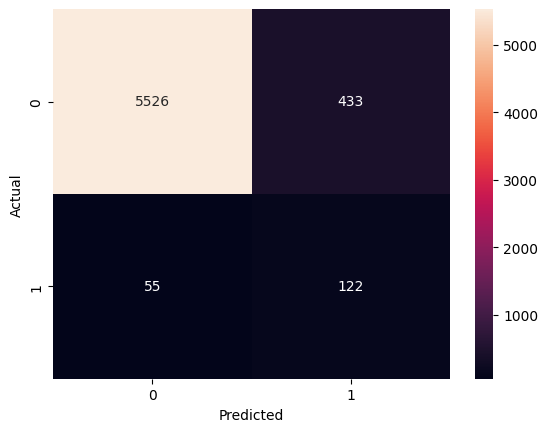

In [284]:
sns.heatmap(conf_matrix_test, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

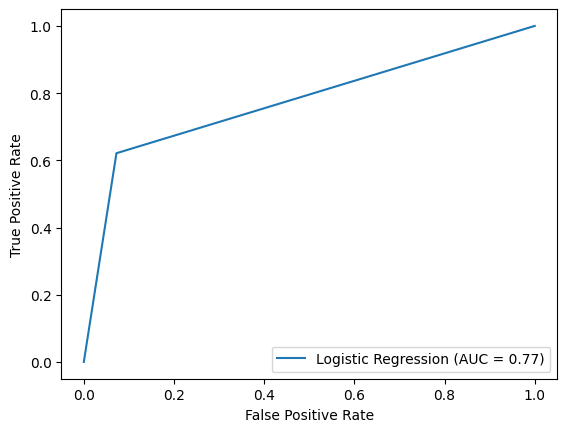

In [285]:
# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

#Summary of Model

In [287]:
# Evaluation metrics on train set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_confusion_matrix = confusion_matrix(y_train, y_pred_train)

In [288]:
# Evaluation metrics on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_confusion_matrix = confusion_matrix(y_test, y_pred_test)

In [289]:
summary_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
}

summary_df = pd.DataFrame(summary_data)

print("Summary Report:")
print(summary_df)

print("\nSelected Features:")
print(selected_features)


Summary Report:
      Metric  Train Set  Test Set
0   Accuracy   0.919152  0.920469
1  Precision   0.621145  0.689266
2     Recall   0.196836  0.219820
3   F1 Score   0.298940  0.333333

Selected Features:
Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'apache_2_diagnosis', 'arf_apache', 'bun_apache',
       'creatinine_apache', 'gcs_eyes_apache', 'glucose_apache',
       'heart_rate_apache', 'hematocrit_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache',
       'ventilated_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max',
       'd1_spo2_min', 'd1_temp_max', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_temp_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_platelets_max',

In [290]:
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
model_stats = sm.Logit(y_train, X_train).fit()

# Get the summary of the logistic regression model
print(model_stats.summary())

Optimization terminated successfully.
         Current function value: 0.218738
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         hospital_death   No. Observations:                24540
Model:                          Logit   Df Residuals:                    24486
Method:                           MLE   Df Model:                           53
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.2632
Time:                        19:39:37   Log-Likelihood:                -5367.8
converged:                       True   LL-Null:                       -7285.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1393      0.038    -83.300      0.000      -3.213      -3.065
x1             0.4492      0.

In [291]:
coefficients = model.coef_
print("Coefficients (Beta) for Selected Features:")
for feature, coefficient in zip(selected_features, coefficients[0]):
    print(f"{feature}: {coefficient}")

Coefficients (Beta) for Selected Features:
age: 0.4486495530176025
bmi: -0.08805986096029156
elective_surgery: -0.4166176309137682
ethnicity: 0.0043344374043386945
gender: 0.06507052526838823
height: 0.003979962654057464
hospital_admit_source: 0.05449319563704147
icu_stay_type: 0.009357611535826408
icu_type: 0.020207867863661546
pre_icu_los_days: 0.11226289644861161
apache_2_diagnosis: -0.029268334774558296
arf_apache: 0.06124041293456141
bun_apache: 0.2259559532938391
creatinine_apache: -0.01672954724850549
gcs_eyes_apache: -0.3804977949517292
glucose_apache: -0.01763446011590343
heart_rate_apache: 0.17598923422125898
hematocrit_apache: -0.009632834676523387
intubated_apache: 0.11276172283670789
map_apache: 0.013457865862084183
resprate_apache: 0.16073871585364863
sodium_apache: -0.05966932198517575
temp_apache: -0.14555707351724592
ventilated_apache: 0.40080023996894404
wbc_apache: 0.188304758554751
d1_diasbp_max: -0.019187809430663384
d1_diasbp_min: -0.22699795903970627
d1_heartrate